In [159]:
def MoPS_compatibility(signal : np.ndarray) -> bool : 

    pmt_active_counter = 0
    y_min, y_max = 3, 31
    min_slope_length = 2
    pmt_multiplicity = 2
    min_occupancy = 4

    # assume we're fed 120 bin trace windows

    for pmt in signal:
        occupancy = 0
        positive_steps = np.nonzero(np.diff(pmt) > 0)[0]
        steps_isolated = np.split(positive_steps, np.where(np.diff(positive_steps) != 1)[0] + 1)
        candidate_flanks = [step for step in steps_isolated if len(step) >= min_slope_length]
        candidate_flanks = [np.append(flank, flank[-1] + 1) for flank in candidate_flanks]

        for i, flank in enumerate(candidate_flanks):

            # adjust searching area after encountering a positive flank
            total_y_rise = (pmt[flank[-1]] - pmt[flank[0]]) * GLOBAL.q_peak
            n_continue_at_index = flank[-1] + max(0, int(np.log2(total_y_rise) - 2))

            for consecutive_flank in candidate_flanks[i + 1:]:

                if n_continue_at_index <= consecutive_flank[0]: break                                                       # no overlap, no need to do anything
                elif consecutive_flank[0] < n_continue_at_index <= consecutive_flank[-1]:                                   # partial overlap, adjust next flank
                    original_index = candidate_flanks.index(consecutive_flank)
                    overlap_index = consecutive_flank.index(n_continue_at_index)
                    candidate_flanks[original_index] = candidate_flanks[original_index][overlap_index:]
                    if len(candidate_flanks[original_index]) < min_slope_length: _ = candidate_flanks.pop(original_index)
                    break

                elif consecutive_flank[-1] < n_continue_at_index:                                                            # complete overlap, discard next flank
                    original_index = candidate_flanks.index(consecutive_flank)
                    _ = candidate_flanks.pop(original_index)

            if total_y_rise > y_min and total_y_rise < y_max: occupancy += 1

        if occupancy > min_occupancy: pmt_active_counter += 1

    # final check regarding integral would go here

    return pmt_active_counter >= pmt_multiplicity


False

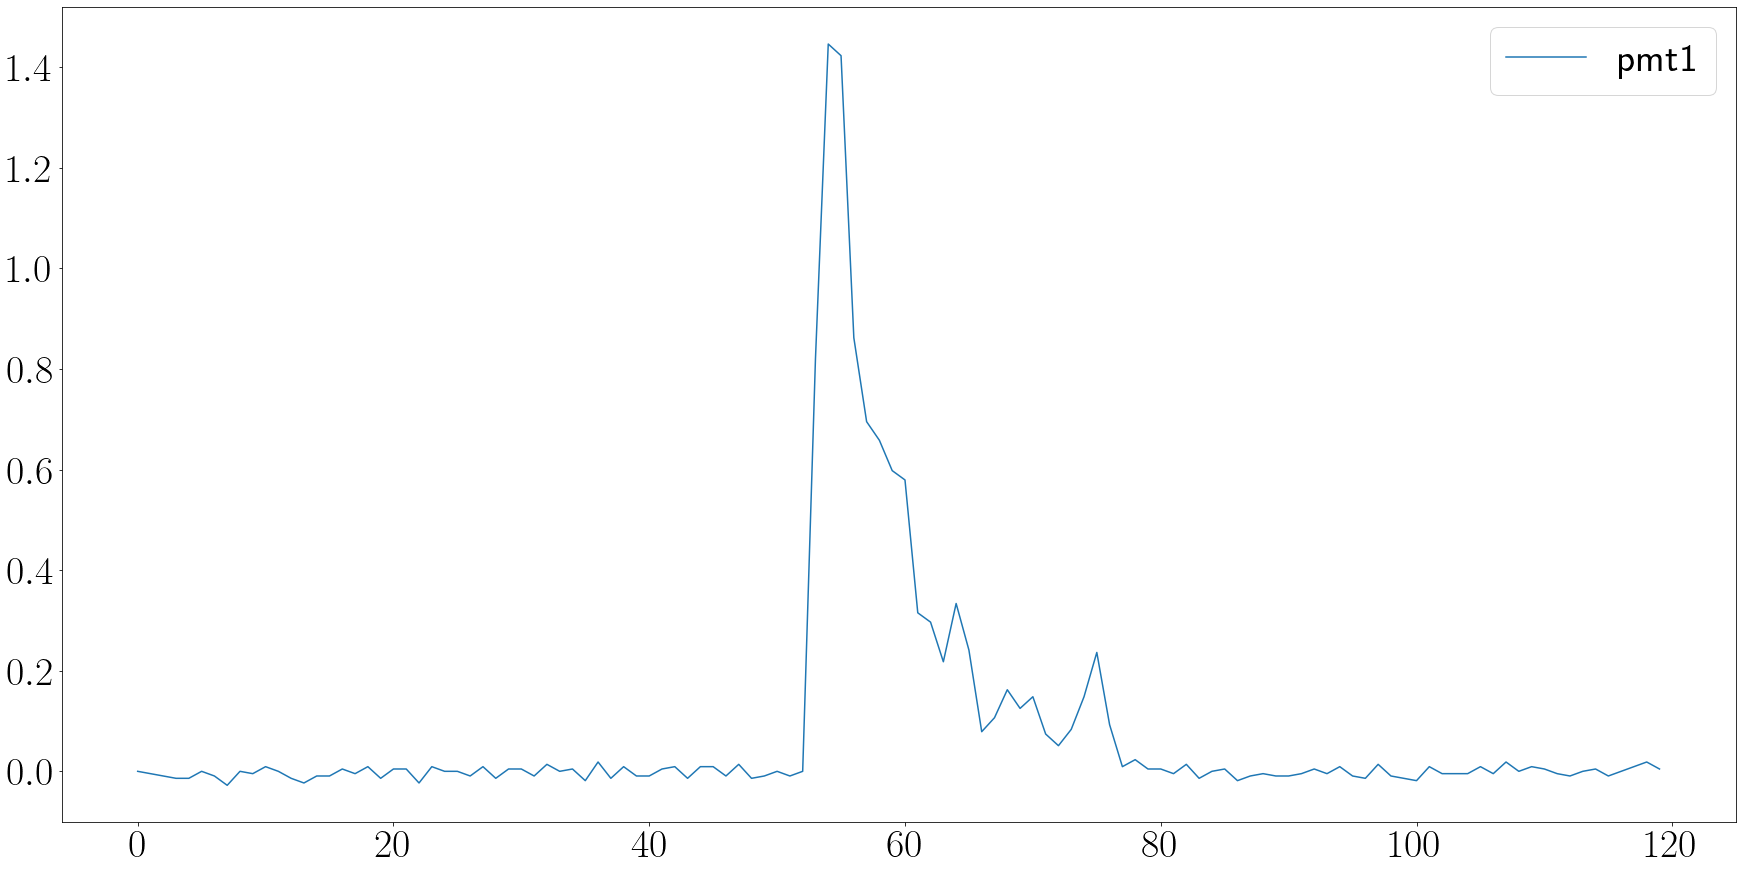

In [160]:
from Binaries import *

random_index = 6

Events, _ = EventGenerator("all", real_background = False, seed = 42)

traces, _ = Events.__getitem__(0)

plt.plot(range(120), traces[random_index][0], label = "pmt1")
# plt.plot(range(120), traces[random_index][1])
# plt.plot(range(120), traces[random_index][2])

plt.legend()
test_trace = traces[random_index]

MoPS_compatibility(test_trace)

In [108]:
testlist = [[123, 123, 514] , ["a", "dl", "gj"], [0], 0]

In [111]:
testlist.index([123, 123, 514])

0

In [151]:
testlist = [0, 1,2,3,4,5,6,7,8,9]

for item in testlist:

    print(item)

    _ = testlist.pop(-1)

0
1
2
3
4
